**Mohsin Shah**        
Cotton Plant Disease Petection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/Datasets/Cotton Plant Disease Dataset",
    shuffle = True,
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 3875 files belonging to 5 classes.


In [5]:
class_name = dataset.class_names
class_name

['Bacterial Blight', 'Curl Virus', 'Fussarium Wilt', 'Gray Mildev', 'Healthy']

In [6]:
# 122 mean that there is 122 element in each batch
len(dataset)

122

In [7]:
122*32

3904

**Print Image of each batch**

tf.Tensor(
[[[103.1582   159.1582   124.1582  ]
  [105.8418   161.52539  126.68359 ]
  [103.1543   157.1543   123.1543  ]
  ...
  [ 79.52734  126.52734   82.52734 ]
  [ 75.63281  125.1582    76.94922 ]
  [ 70.26367  122.1582    73.1582  ]]

 [[103.10547  159.10547  124.10547 ]
  [105.       160.6836   125.8418  ]
  [103.41797  157.41797  123.41797 ]
  ...
  [ 82.68164  129.1543    83.94531 ]
  [ 81.47461  131.        82.47461 ]
  [ 78.1582   128.1582    79.1582  ]]

 [[ 97.1582   153.1582   118.1582  ]
  [100.1582   155.8418   121.      ]
  [100.208984 154.20898  120.208984]
  ...
  [ 87.       132.73633   87.52734 ]
  [ 86.1582   133.8418    86.1582  ]
  [ 86.       134.        86.      ]]

 ...

 [[ 18.947266  49.052734  13.      ]
  [ 18.158203  50.158203  13.158203]
  [ 19.263672  51.26367   14.263672]
  ...
  [ 94.52734   92.52734   43.527344]
  [ 93.1582    91.1582    42.158203]
  [ 92.052734  90.052734  42.      ]]

 [[ 19.894531  47.052734  12.      ]
  [ 18.        48.        

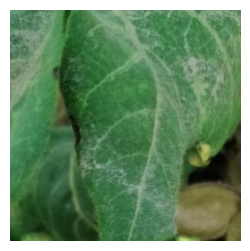

In [8]:
plt.figure(figsize = (3,3))
for image_batch, label_batch in dataset.take(1):
  # It show tensor of images 
  print(image_batch[0])
  # It Show numpy array images
  print(image_batch[0].numpy())
  # it show shape of image
  print(image_batch[0].shape)
  # it show the different class value
  print("class number = ", label_batch[0].numpy())
  # It show the class name of the image
  print("class Name = ", class_name[label_batch[0]])
  # It show the specfic image
  plt.imshow(image_batch[0].numpy().astype('uint8'))
  plt.axis('off')


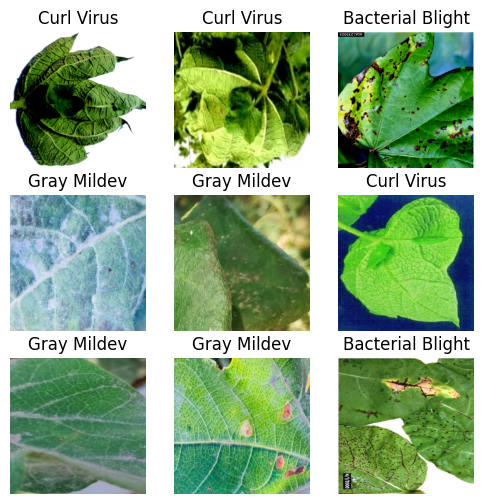

In [9]:
plt.figure(figsize = (6,6))

for image_batch, label_batch in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_name[label_batch[i]])
    plt.axis('off')

**Divide the Dataset into train, test, valid**

In [10]:
# The size of train dataset is 80%
# The size of test dataset is 10%
# The size of valid dataset is 10%

train_datasize = int(0.8*len(dataset))
test_datasize = int(0.1*len(dataset))
valid_datasize = int(0.1*len(dataset))

train_datasize, test_datasize, valid_datasize

(97, 12, 12)

In [11]:
Train_dataset = dataset.take(train_datasize)
Test_dataset = dataset.skip(train_datasize).take(test_datasize)
Valid_dataset = dataset.skip(train_datasize+test_datasize)
print(f"Train Dataset lenght = {len(Train_dataset)}\nTest Dataset lenght = {len(Test_dataset)}\nValid Dataset lenght = {len(Valid_dataset)}")

Train Dataset lenght = 97
Test Dataset lenght = 12
Valid Dataset lenght = 13


**we also Create a function to split the Dataset**

In [12]:
def split_dataset(dataset, train_size, test_size, valid_size, shuffle = True, shuffle_size = 10000):
  dataset_size = len(dataset)

  if shuffle:
    dataset = dataset.shuffle(shuffle_size, seed = 15)

  train_datasize = int(train_size*dataset_size)
  test_datasize = int(test_size*dataset_size)
  valid_datasize = int(valid_size*dataset_size)

  Train_dataset = dataset.take(train_datasize)
  Test_dataset = dataset.skip(train_datasize).take(test_datasize)
  Valid_dataset = dataset.skip(train_datasize+test_datasize)

  return Train_dataset, Test_dataset, Valid_dataset

In [13]:
Train_dataset, Test_dataset, Valid_dataset = split_dataset(dataset, 0.8, 0.1, 0.1)
print(f"Train Dataset lenght = {len(Train_dataset)}\nTest Dataset lenght = {len(Test_dataset)}\nValid Dataset lenght = {len(Valid_dataset)}")

Train Dataset lenght = 97
Test Dataset lenght = 12
Valid Dataset lenght = 13


**Preprocessing**

In [14]:
Train_dataset = Train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
Test_dataset = Test_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
Valid_dataset = Valid_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [15]:
resize_and_rescale = keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [16]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

**Convalution Neural Network Model**

In [17]:
# Its mean that there is five main Classes
n_class = 5

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_class, activation = 'softmax')

])

# The first argument is batch size
# Second anf third argument is size of image
# The forth argument is channel size
model.build((32, 256, 256, 3))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [19]:
model.compile(
    optimizer = 'adam',
    #loss = 'binary_crossentropy',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [20]:
history = model.fit(
    Train_dataset,
    epochs = 20,
    verbose = 1,
    batch_size = 32,
    validation_data = Valid_dataset
)

Epoch 1/20
97/97 [==============================] - 651s 222ms/step - loss: 0.8867 - accuracy: 0.6775 - val_loss: 0.7279 - val_accuracy: 0.7188
Epoch 2/20
97/97 [==============================] - 6s 58ms/step - loss: 0.6313 - accuracy: 0.7748 - val_loss: 0.5612 - val_accuracy: 0.7788
Epoch 3/20
97/97 [==============================] - 6s 58ms/step - loss: 0.4901 - accuracy: 0.8251 - val_loss: 0.5126 - val_accuracy: 0.8029
Epoch 4/20
97/97 [==============================] - 6s 59ms/step - loss: 0.4335 - accuracy: 0.8438 - val_loss: 0.3905 - val_accuracy: 0.8317
Epoch 5/20
97/97 [==============================] - 6s 59ms/step - loss: 0.3943 - accuracy: 0.8673 - val_loss: 0.4209 - val_accuracy: 0.8654
Epoch 6/20
97/97 [==============================] - 6s 59ms/step - loss: 0.3224 - accuracy: 0.8908 - val_loss: 0.2735 - val_accuracy: 0.8870
Epoch 7/20
97/97 [==============================] - 6s 60ms/step - loss: 0.3018 - accuracy: 0.8966 - val_loss: 0.2661 - val_accuracy: 0.9111
Epoch 8/20

In [21]:
# check the history parameter
history.params

{'verbose': 1, 'epochs': 20, 'steps': 97}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Check the score accuracy through test dataset**

In [23]:
score = model.evaluate(Test_dataset)
score

12/12 [==============================] - 16s 28ms/step - loss: 0.1067 - accuracy: 0.9688


[0.10669317841529846, 0.96875]

**Visualize Accuracy and Loss of Train and valid Data**

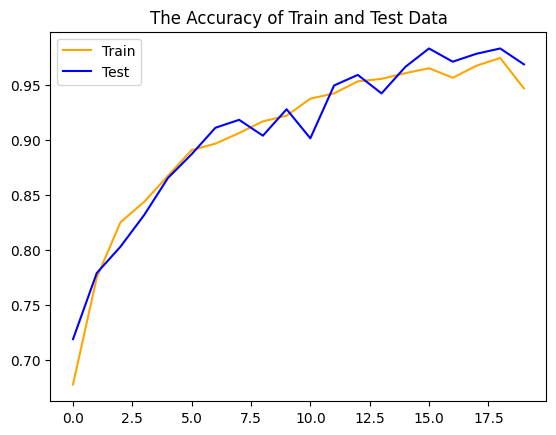

In [24]:
# put range is 20 because there is 20 epoch

plt.plot(range(20),history.history['accuracy'], color = 'orange', label = 'Train')
plt.plot(range(20),history.history['val_accuracy'], color = 'blue', label = 'Test')
plt.title('The Accuracy of Train and Test Data')
plt.legend()
plt.show()

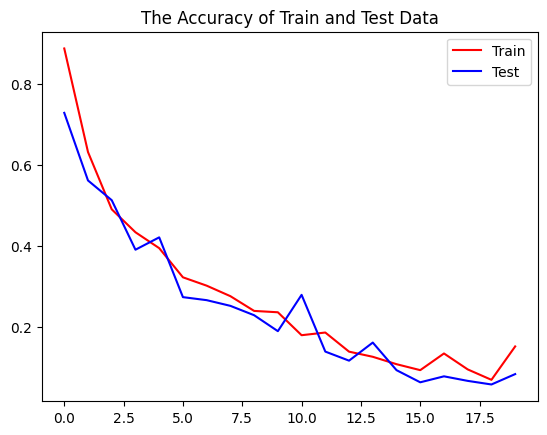

In [25]:
plt.plot(range(20),history.history['loss'], color = 'red', label = 'Train')
plt.plot(range(20),history.history['val_loss'], color = 'blue', label = 'Test')
plt.title('The Accuracy of Train and Test Data')
plt.legend()
plt.show()

**Prediction of Different leafs**

In [37]:
import cv2
import numpy as np

**Healthy Image**

In [39]:
healthy = cv2.imread("/content/healthy.jpg")

(-0.5, 182.5, 275.5, -0.5)

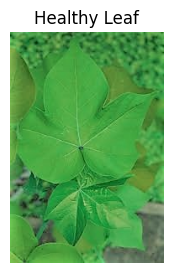

In [40]:
plt.figure(figsize = (3,3))
plt.imshow(healthy)
plt.title("Healthy Leaf")
plt.axis('off')

In [41]:
healthy.shape

(276, 183, 3)

In [42]:
# Now we have to reshape and resize the image
healthy = cv2.resize(healthy, (256, 256))
healthy = healthy.reshape(1,256, 256, 3)

In [43]:
image_pred = model.predict(healthy)

1/1 [==============================] - 0s 52ms/step


In [44]:
print("Predicted image is = ", class_name[np.argmax(image_pred[0])])

Predicted image is =  Healthy


**Curl Virus**

In [50]:
curl_virus = cv2.imread("/content/curl virus.jpg")

(-0.5, 121.5, 126.5, -0.5)

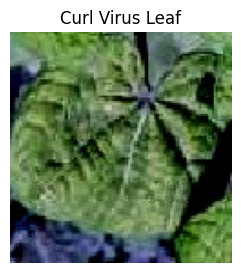

In [51]:
plt.figure(figsize = (3,3))
plt.imshow(curl_virus)
plt.title("Curl Virus Leaf")
plt.axis("off")

In [52]:
curl_virus.shape

(127, 122, 3)

In [53]:
# Now resize and reshape the image
curl_virus = cv2.resize(curl_virus, (256,256))
curl_virus = curl_virus.reshape(1,256,256,3)

In [54]:
curl_predicted_image = model.predict(curl_virus)
print("Predicted image leaf is = ", class_name[np.argmax(curl_predicted_image[0])])

1/1 [==============================] - 0s 18ms/step
Predicted image leaf is =  Curl Virus
